In [1]:
import warnings
warnings.filterwarnings("ignore")
# loading packages
# 1 basic
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# 1. get the data

In [2]:
train_df=pd.read_csv('train.csv')
store_df=pd.read_csv('store.csv')
test_df=pd.read_csv('test.csv')

# 2. check dataset information

In [3]:

train_df.head()
train_df.info()
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
store_df.info()
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType               

# 3. try to find the outliers

In [4]:
def check_unique(data):
    for column in data.columns:
        print('{}  unique values quantity: '.format(column),len(data[column].unique()))

## 3.1 check store data set

In [5]:
check_unique(store_df)

Store  unique values quantity:  1115
StoreType  unique values quantity:  4
Assortment  unique values quantity:  3
CompetitionDistance  unique values quantity:  655
CompetitionOpenSinceMonth  unique values quantity:  13
CompetitionOpenSinceYear  unique values quantity:  24
Promo2  unique values quantity:  2
Promo2SinceWeek  unique values quantity:  25
Promo2SinceYear  unique values quantity:  8
PromoInterval  unique values quantity:  4


In [6]:
np.sort(store_df['CompetitionOpenSinceMonth'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., nan])

In [7]:
np.sort(store_df['CompetitionOpenSinceYear'].unique())

array([1900., 1961., 1990., 1994., 1995., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012., 2013., 2014., 2015.,   nan])

## 3.2 check train data set

In [8]:
check_unique(train_df)

Store  unique values quantity:  1115
DayOfWeek  unique values quantity:  7
Date  unique values quantity:  942
Sales  unique values quantity:  21734
Customers  unique values quantity:  4086
Open  unique values quantity:  2
Promo  unique values quantity:  2
StateHoliday  unique values quantity:  5
SchoolHoliday  unique values quantity:  2


In [9]:
train_df['StateHoliday'].unique()
train_df['StateHoliday']=train_df.StateHoliday.map({'0':'none',0:'none','a':'public holiday','b':'Easter','c':'Christmas'})
train_df['StateHoliday'].unique()

array(['none', 'public holiday', 'Easter', 'Christmas'], dtype=object)

## 3.2 check test data set

In [10]:
check_unique(test_df)

Id  unique values quantity:  41088
Store  unique values quantity:  856
DayOfWeek  unique values quantity:  7
Date  unique values quantity:  48
Open  unique values quantity:  3
Promo  unique values quantity:  2
StateHoliday  unique values quantity:  2
SchoolHoliday  unique values quantity:  2


In [11]:
test_df['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [12]:
test_df['Open'].unique()

array([ 1., nan,  0.])

## 3.3 check missing data (Nan)

In [13]:
def check_Nan(data):
    print('{:*^50}'.format("the columns includ Nan"))
    print(data.isnull().any(axis=0)) # 判断那些列含缺失值， 默认axis=0，就是看列
    print('{:*^50}'.format("the quantity of Nan"))
    print(data.isnull().any(axis=1).sum())

In [14]:
check_Nan(store_df)

**************the columns includ Nan**************
Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool
***************the quantity of Nan****************
750


In [15]:
check_Nan(train_df)

**************the columns includ Nan**************
Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool
***************the quantity of Nan****************
0


### conclusion: we found that the store_df include some missing data, I guess this because there is no competition, if the speculation is right, then, the everything about competition is Nan, like CompetitionDistance,CompetitionOpenSinceMonth.etc. 
### another speculation is if prom2 is 0, then the corresponding data like Promo2SinceWeek should be Nan.
### we need to verify the guesses

In [16]:
def check_none_together(data,columns):
    indexes=[]
    indexes_len=[]
    for column in columns:
        index=data[data[column].isnull()].index # 找出每列有空值的行索引
        indexes_len.append(len(index))# 计算每列的缺失值的数量
        indexes.append(index)# 保留每一列缺失值的索引
    if set(indexes[0])==set(indexes[1]) and set(indexes[1])==set(indexes[2]):
        print("all of this row is Nan")
    else:
         print(indexes_len[0],indexes_len[1],indexes_len[2])#不一样，则把每个列缺失行数打印出来
    return indexes

In [17]:
index_1=check_none_together(store_df,['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])

3 354 354


In [18]:
# check if those two is Nan in same row
index_2=check_none_together(store_df,['CompetitionOpenSinceYear','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])

all of this row is Nan


In [19]:
# show the NaN row in the CompetitionDistance
store_df.iloc[index_1[0].values] 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [20]:
store_df.iloc[index_1[1].values].sample(5) 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
964,965,a,c,110.0,NaN,NaN,0,NaN,NaN,NaN
1036,1037,a,c,150.0,NaN,NaN,0,NaN,NaN,NaN
735,736,c,c,1650.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
828,829,c,a,110.0,NaN,NaN,0,NaN,NaN,NaN
889,890,a,a,4450.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


#### conclusion: in the case of no competitor, the rest of CompetitionOpenSinceMonth and CompetitionOpenSinceYear empty values should be no records, but there are actually relevant data

In [21]:
# check promo2 and the correspoding data
index_3=check_none_together(store_df,['Promo2SinceWeek','Promo2SinceYear','PromoInterval'])
sum(store_df.iloc[index_3[0]]['Promo2']!=0)#检验空值行的Promo2是否都为0

all of this row is Nan


0

#### conclusion: if promo2==0, then the corresponding data is NaN.

# 3 merge store and train together

In [31]:
data_train_new=pd.merge(train_df,store_df,on='Store',how='left')
data_train_new.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,none,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,none,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,none,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,none,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,none,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [32]:
data_train_new.Date=pd.to_datetime(data_train_new.Date)
data_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [33]:
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,none,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,none,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,none,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,none,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,none,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 4 exploratory data analysis

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Store
1        371.6854
2        388.3858
3        540.8261
4        755.6507
5        364.2818
          ...    
1111     409.1076
1112     797.4294
1113     519.6242
1114    1620.2585
1115     492.2229
Name: Sales, Length: 1115, dtype: float64


Text(0.5, 6.79999999999999, 'Total Sales')

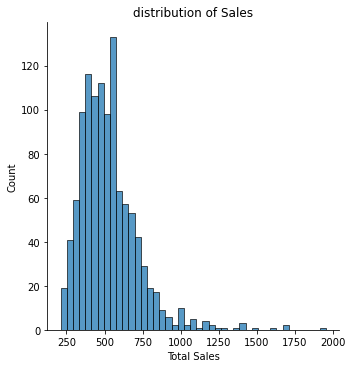

In [37]:
df1=data_train_new.groupby('Store')['Sales'].sum()/10000
print(df1)
sns.displot(df1)
plt.title('distribution of Sales')
plt.xlabel('Total Sales')

## 4.1 the connection between Sales and time

   DayOfWeek        Sales
0          1  7809.044510
1          2  7005.244467
2          3  6555.884138
3          4  6247.575913
4          5  6723.274305
5          6  5847.562599
6          7   204.183189


Text(0.5, 1.0, 'Sales in different day of week')

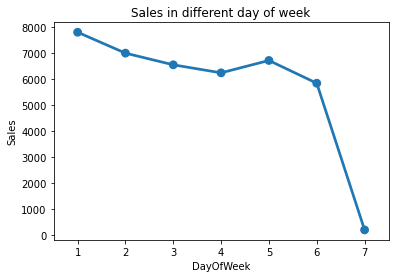

In [40]:
df2=data_train_new.groupby('DayOfWeek')['Sales'].mean().reset_index()
print(df2)
sns.pointplot(data=df2,x='DayOfWeek',y='Sales')
plt.title('Sales in different day of week')


#### conclusion: we can see the Salese reduces with the time changes from Monday to Sunday. on Sunday most of the store do not open